In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Utils
from utils.plot_utils import newplot

# Import some useful functions
from scipy.special import lambertw


In [26]:
# Leading log sudakov factor for angularities
def p_angularity(e, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""

    Delta = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(np.log(e),2) )

    return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)

def p_alpha_given_beta(e_alpha, e_beta, alpha = 2.0, beta = 1.0, alpha_s = 0.12, C_i = 4/3):

    term1 = 1 / e_alpha / np.log(1/e_beta)
    term2 = beta / np.abs(alpha - beta)

    theta_1 = e_alpha > 0
    theta_2 = e_beta < 1
    theta_3 = np.power(e_alpha,beta) - np.power(e_beta,alpha) > 0
    theta_4 =  np.power(e_beta,alpha) / np.power(e_alpha,beta) > np.power(e_alpha, alpha-beta)
    theta = theta_1 * theta_2 * theta_3 * theta_4

    p = term1 * term2
    return np.real(np.nan_to_num(p * theta))


# Calculate p_l by multipling p_l_given_angularity by p_angularity and integrating over e
def p_alpha(l, alpha = 2.0, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""

    # Compute the integral. l can be a numpy array


    e = np.linspace(0.000, 1, 1001)
    p1 = p_alpha_given_beta(l[:,None], e[None,:], alpha, beta, alpha_s, C_i)
    p2 = p_angularity(e[None,:], beta, alpha_s, C_i)
    return np.trapz(p1 * p2, e)

def p_l_analytic(l, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""


    term1 = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(l,2) )
    derivative = -2 * alpha_s * C_i * l / (beta * np.pi) 

    return term1 * derivative

def cdf_analytic(l, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""

    term1 = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(l,2) )

    return term1

0.0
0.9967133352889397
0.981292161743702
1.0008836050499512
1.0178063545270093
0.9823774545019583
0.9902199515539046
0.9966917129571831
1.024825992531348
0.9892491817600563
0.5373250167010113
0.6506319617199903
0.7083122064747079
0.7407833628790429


/tmp/ipykernel_45058/723552063.py:11: RuntimeWarning: divide by zero encountered in true_divide
  term1 = 1 / e_alpha / np.log(1/e_beta)
/tmp/ipykernel_45058/723552063.py:21: RuntimeWarning: invalid value encountered in multiply
  return np.real(np.nan_to_num(p * theta))
/tmp/ipykernel_45058/723552063.py:5: RuntimeWarning: divide by zero encountered in log
  Delta = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(np.log(e),2) )
/tmp/ipykernel_45058/723552063.py:7: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)
/tmp/ipykernel_45058/723552063.py:7: RuntimeWarning: invalid value encountered in multiply
  return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)


0.7658664503939466
0.7769709283645188


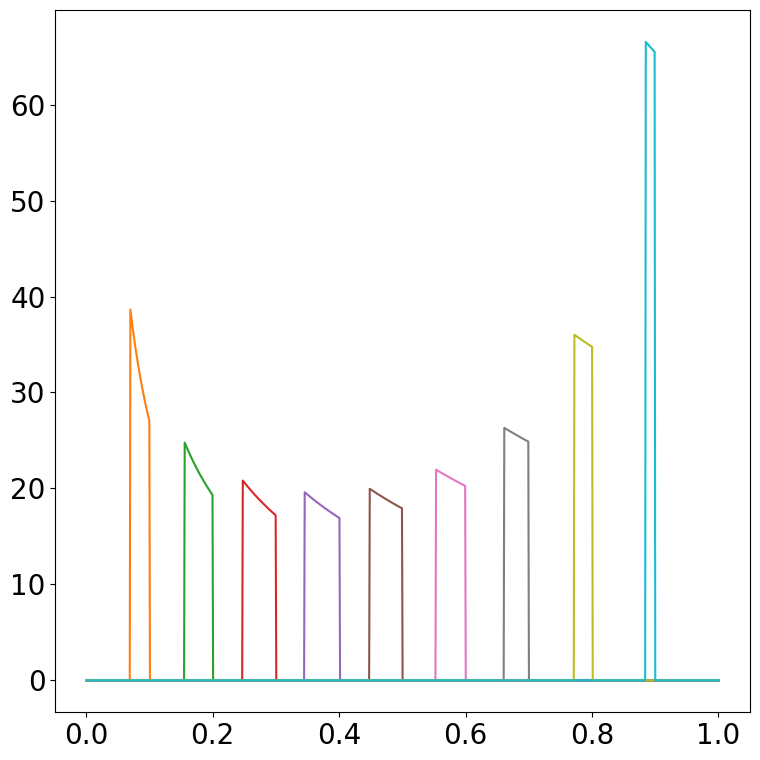

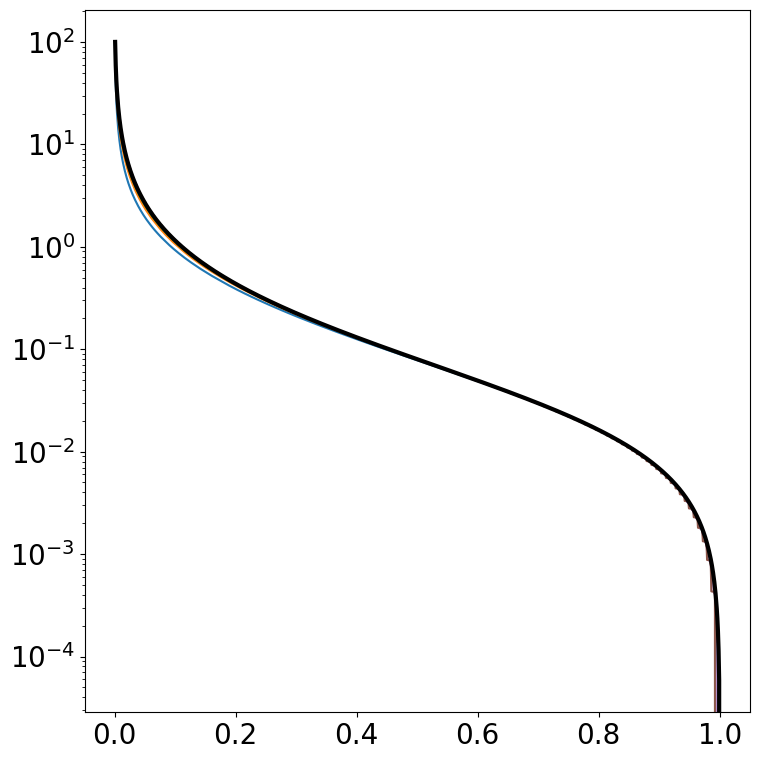

In [27]:

e_a = np.linspace(0.001, 1, 1001)


# Plot p(e_alp0ha | e_beta) for different values of e_beta
newplot()
e_b = np.linspace(0.001, 1, 1001)
for i in range(0, 1000, 100):
    plt.plot(e_a, p_alpha_given_beta(e_a, e_b[i], alpha = 1.742, beta = 1.5), label = r"$e_\beta = %.2f$" % e_b[i])

    # print the value of the integral for each curve (should be 1)
    print(np.trapz(p_alpha_given_beta(e_a, e_b[i], alpha = 1.742, beta = 1.5), e_a))

# plot p(e_alpha) for different values of beta
newplot()
betas = [.25, 0.5, 0.75, 1.0, 1.25, 1.5]
l = np.linspace(0.001, 1, 1001)
for i in range(len(betas)):
    plt.plot(l, p_alpha(l, alpha = 1.742, beta = betas[i]), label = r"$\beta = %.2f$" % betas[i])

    # print the value of the integral for each curve (should be 1)
    print(np.trapz(p_alpha(l, alpha = 1.742, beta = betas[i]), l))
plt.plot(l, p_angularity(l, beta = 1.742), lw = 3, color = "black")
plt.yscale("log")

/tmp/ipykernel_6822/232740521.py:5: RuntimeWarning: divide by zero encountered in log
  Delta = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(np.log(e),2) )
/tmp/ipykernel_6822/232740521.py:7: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)
/tmp/ipykernel_6822/232740521.py:7: RuntimeWarning: invalid value encountered in multiply
  return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)
/tmp/ipykernel_6822/232740521.py:11: RuntimeWarning: divide by zero encountered in true_divide
  x = -beta * l / e
/tmp/ipykernel_6822/232740521.py:17: RuntimeWarning: invalid value encountered in true_divide
  theta_4 = np.exp(-W / beta) < 1
/tmp/ipykernel_6822/232740521.py:20: RuntimeWarning: divide by zero encountered in log
  p = -beta / (e * np.log(e)) * np.exp(-W) / (1 + W)
/tmp/ipykernel_6822/232740521.py:20: RuntimeWarning: invalid value encountered in double_scalars
  p

0.9451509300391528
0.0
1.0027618635441267
1.0030590635678682
0.9973890986251629
0.995279164981848
0.9962792091627537
0.9966546060447408
0.9962583852649087
0.9952482933276875
0.9986817805248024
0.0
[24.38259595 24.38189788 24.38118033 ...  0.          0.
  0.        ]
0.9451464281445351


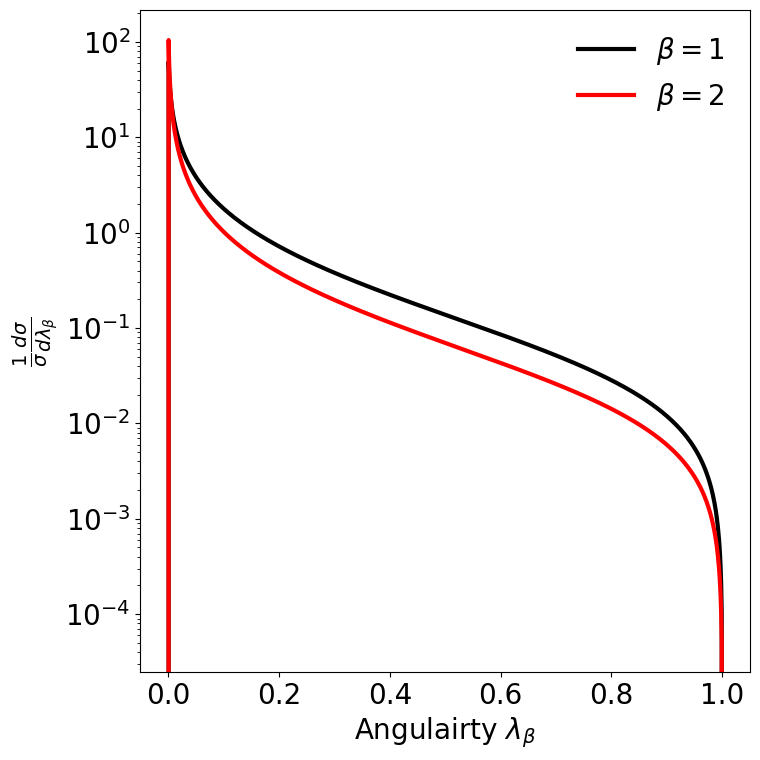

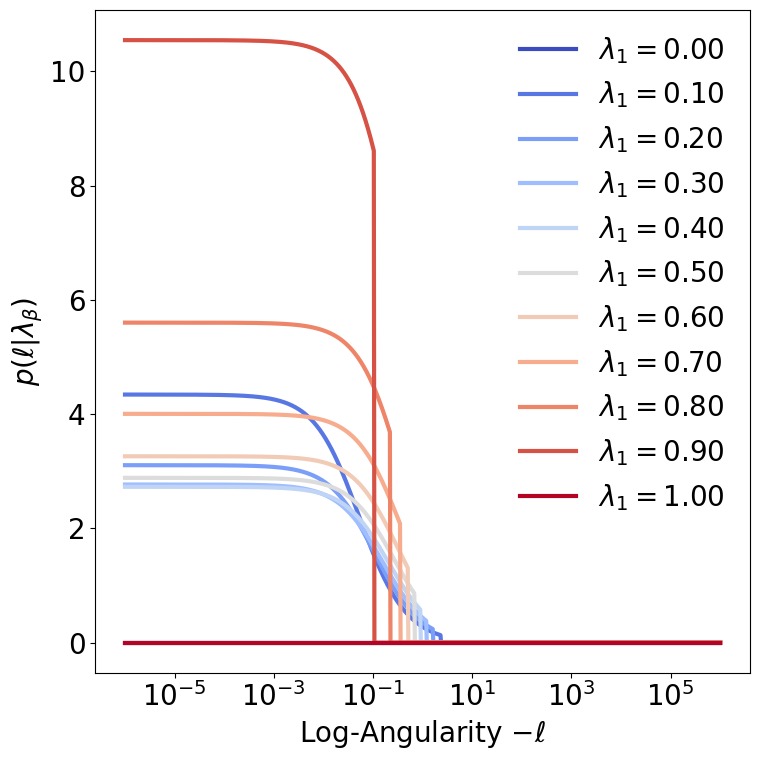

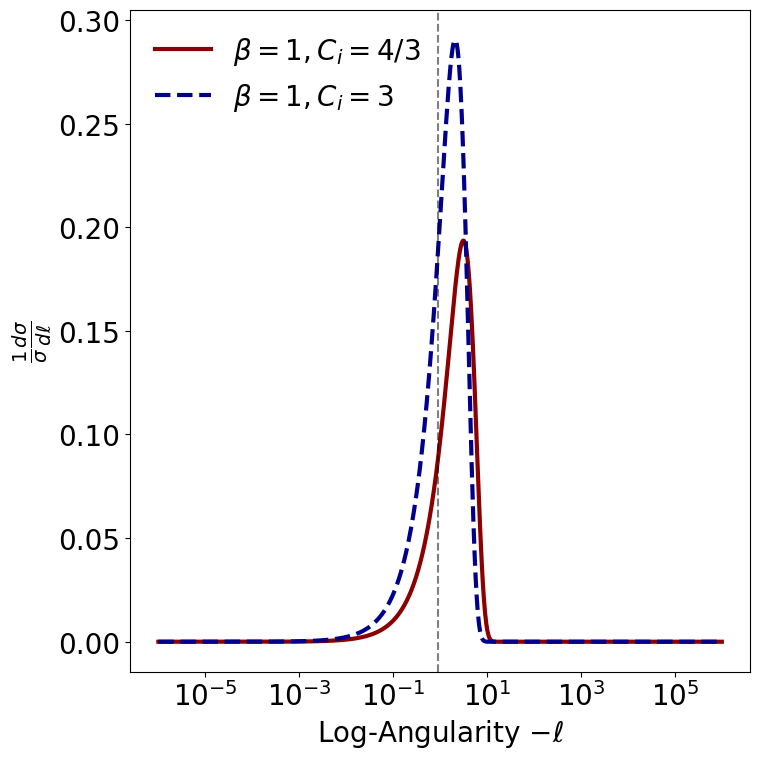

In [9]:
# Plots
angularities = np.linspace(0.000, 1, 1001)
ls = -np.logspace(-6, 6, 1001)

# Plot of p(e)
newplot()
plt.plot(angularities, p_angularity(angularities), label = r'$\beta = 1$', lw = 3, color = 'black')
plt.plot(angularities, p_angularity(angularities, beta = 2), label = r'$\beta = 2$', lw = 3, color = 'red')
print(np.trapz(p_angularity(angularities), angularities))

plt.legend(frameon = False)
plt.xlabel(r'Angulairty $\lambda_{\beta}$')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d\lambda_{\beta}}$')
plt.yscale('log')

# Plot of p(l | e):
newplot()  
for e in np.linspace(0.00, 1, 11):
    plt.plot(-ls, p_l_given_angularity(ls, e), label = rf'$\lambda_{1} = {e : .2f}$', lw = 3, color = plt.cm.coolwarm(e))
    print(np.trapz(p_l_given_angularity(ls, e), -ls))
# plt.plot(-ls, p_l_given_angularity(ls, 0.1), label = r'$\lambda_{1} = 0.1$', color = 'black')

plt.legend(frameon = False)
plt.xlabel(r'Log-Angularity $-\ell$')
plt.ylabel(r'$p(\ell | \lambda_\beta)$')
plt.xscale('log')

# Plot of p(l)
newplot()
print(p_l(ls))

# Plot for C_i = 4/3 (solid, red) and C_i = 3 (dashed, blue)
# plt.plot(-ls, p_l(ls), label = r'$\beta = 1, C_i = 4/3$', lw = 3, color = 'red')
# plt.plot(-ls, p_l(ls, C_i = 3), label = r'$\beta = 1, C_i = 3$', lw = 3, color = 'blue', ls = "--")

# Plot the same as above but with analytic expression:
plt.plot(-ls, p_l_analytic(ls), label = r'$\beta = 1, C_i = 4/3$', lw = 3, color = 'darkred')
plt.plot(-ls, p_l_analytic(ls, C_i = 3), label = r'$\beta = 1, C_i = 3$', lw = 3, color = 'darkblue', ls = "--")

# # Plot the same as above but for beta = 2, using dark colors:
# plt.plot(-ls, p_l(ls, beta = 2), label = r'$\beta = 2, C_i = 4/3$', lw = 3, color = 'darkred')
# plt.plot(-ls, p_l(ls, beta = 2, C_i = 3), label = r'$\beta = 2, C_i = 3$', lw = 3, color = 'darkblue', ls = "--")

# Draw a vertical line, and text near it that says log(1/R)
plt.axvline(-np.log(0.4), color = 'black', ls = "--", alpha = 0.5)
# plt.text(-np.log(0.4) * 1.1, 10.1, r'$\ell = \log(R)$', rotation = 90, va = 'center', ha = 'right', color = 'black', alpha = 0.5)



# Numerically compute the integral of p_l against l
integral = np.trapz(p_l(ls), -ls)
print(integral)

# Draw a large arrow facing to the right
# plt.annotate("", xy=(0.4, 0.1), xytext=(0.4, 0.9), arrowprops=dict(arrowstyle="->", color = 'black'))

# plt.plot(-ls, p_l(ls, beta = 2), label = r'$\beta = 2$', lw = 3, color = 'red')

plt.legend(frameon = False)
plt.xlabel(r'Log-Angularity $-\ell$')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d\ell}$')
plt.xscale('log')



/tmp/ipykernel_6822/3775570558.py:11: RuntimeWarning: divide by zero encountered in true_divide
  x = -beta * l / e
/tmp/ipykernel_6822/3775570558.py:17: RuntimeWarning: invalid value encountered in true_divide
  theta_4 = np.exp(-W / beta) < 1
/tmp/ipykernel_6822/3775570558.py:20: RuntimeWarning: divide by zero encountered in log
  p = -beta / (e * np.log(e)) * np.exp(-W) / (1 + W)
/tmp/ipykernel_6822/3775570558.py:20: RuntimeWarning: invalid value encountered in multiply
  p = -beta / (e * np.log(e)) * np.exp(-W) / (1 + W)
/tmp/ipykernel_6822/3775570558.py:20: RuntimeWarning: divide by zero encountered in true_divide
  p = -beta / (e * np.log(e)) * np.exp(-W) / (1 + W)
/tmp/ipykernel_6822/3775570558.py:20: RuntimeWarning: invalid value encountered in true_divide
  p = -beta / (e * np.log(e)) * np.exp(-W) / (1 + W)
/tmp/ipykernel_6822/3775570558.py:5: RuntimeWarning: divide by zero encountered in log
  Delta = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(np.log(e),2) )
/tmp

[ 13.81551056 -13.81551056 -13.81551056 ... -13.81551056 -13.81551056
 -13.81551056]


/tmp/ipykernel_6822/1970404858.py:18: RuntimeWarning: invalid value encountered in log
  return np.nan_to_num(np.interp(np.log(-l), np.log(-ls), cdf))


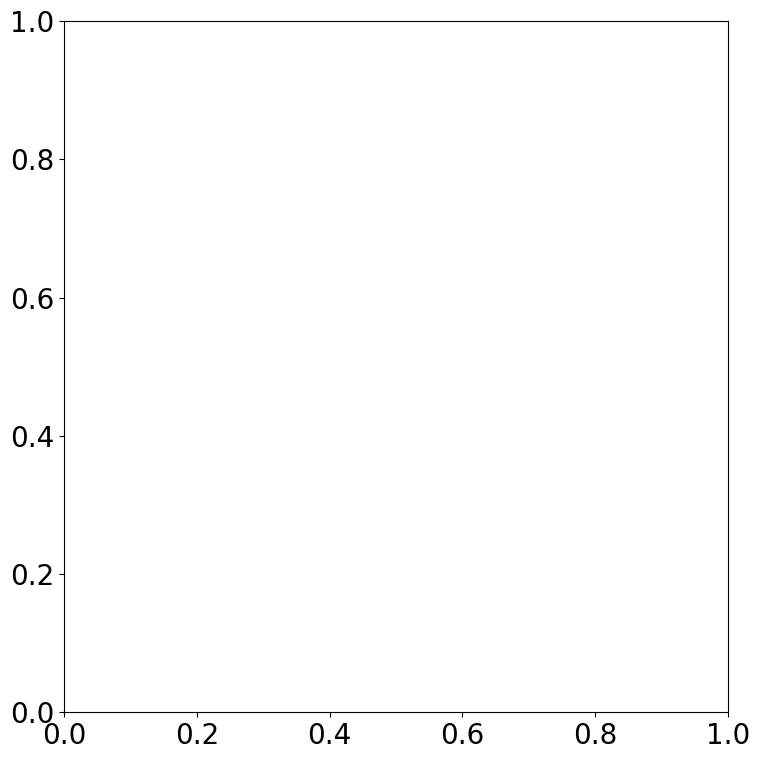

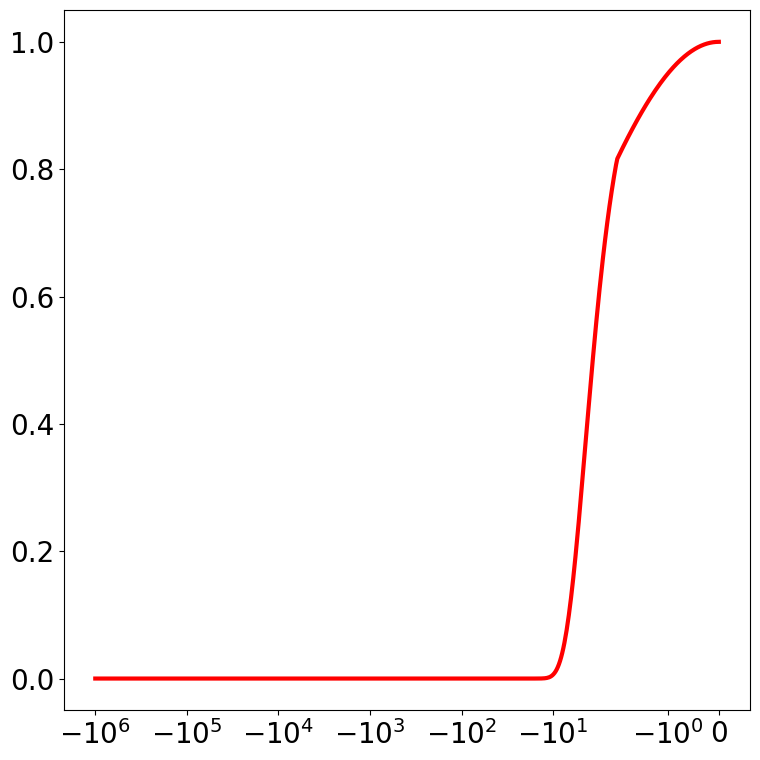

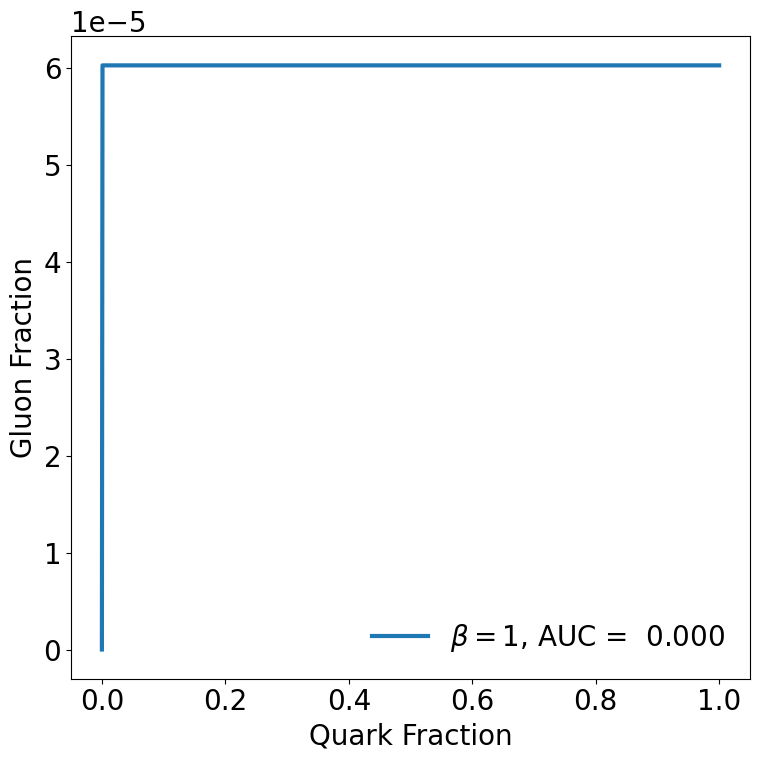

In [26]:
# Get the cumulative distribution functions for C_i = 4/3 and C_i = 3 using cumulative trapezoid:
cdf_4_3 = integrate.cumtrapz(p_l(ls), -ls)
cdf_3 = integrate.cumtrapz(p_l(ls, C_i = 3), -ls)
ps = np.linspace(0, 1, 1001)

# Normalize the cumulative distribution functions:
cdf_4_3 /= cdf_4_3[-1]
cdf_3 /= cdf_3[-1]

# Function to interpolate the value of l for a given cumulative probability for either C_i = 4/3 or C_i = 3:
def l_from_cdf(cdf, ls, p):

    # Interpolate in log space:
    return np.nan_to_num(np.interp(p, cdf, -np.log(-ls)))

# Function to interpolate the CDF:
def cdf_from_l(cdf, ls, l):
    return np.nan_to_num(np.interp(np.log(-l), np.log(-ls), cdf))


# plt.yscale('log')

# # Get the cdf for C_i=3 as a function of the inverse of the cdf for C_i=4/3:

# cdf_3_from_4_3 = np.nan_to_num(np.interp(cdf_4_3, cdf_3, np.log(-ls[:-1]),))
# newplot()
# plt.plot(cdf_4_3, cdf_3_from_4_3)

# # Function to interpolate the value of l for a given cumulative probability for either C_i = 4/3 or C_i = 3:
# def l_from_cdf(cdf, ls, p):

#     # Interpolate in log space:
#     return np.nan_to_num(np.interp(np.log(p), cdf, np.log(-ls[:-1])))

# # Function to interpolate the CDF:
# def cdf_from_l(cdf, ls, l):
#     return np.nan_to_num(np.interp(np.log(-l), np.log(-ls[:-1]), cdf))

# ROC Curve:
def ROC_curve(beta = 1):
    """ROC curve for log-angularities"""

    # Get the cumulative distribution functions for C_i = 4/3 and C_i = 3 using cumulative trapezoid:
    cdf_4_3 = cdf_analytic(ls)
    cdf_3 = cdf_analytic(ls)

    newplot()
    plt.plot(ls, cdf_4_3, label = r'$C_i = 4/3$', lw = 3, color = 'red')
    plt.xscale('symlog')


    ps = np.linspace(0, 1, 1001)
    ls_4_3 = l_from_cdf(cdf_4_3, ls, ps)
    print(ls_4_3)
    roc_points = cdf_from_l(cdf_3, ls, ls_4_3)

    return ps, roc_points, np.trapz(roc_points, ps)


# # Plot the cumulative distribution functions vs l:
# newplot()
# plt.plot(-ls[:-1], cdf_4_3, label = r'$C_i = 4/3$', lw = 3, color = 'red')
# plt.plot(-ls[:-1], cdf_3, label = r'$C_i = 3$', lw = 3, color = 'blue', ls = "--")

# plt.legend(frameon = False)
# plt.xlabel(r'Log-Angularity $-\ell$')
# plt.ylabel(r'$\Sigma(\ell)$')
# plt.xscale('log')


# Plot the ROC curve for several values of beta and print their AUC:
newplot()
for beta in [1,]:
    ps, roc_points, auc = ROC_curve(beta)
    newplot()
    plt.plot(ps, roc_points, label = rf'$\beta = {beta}$, AUC = {auc : .3f}', lw = 3)

    plt.legend(frameon = False)
    plt.xlabel("Quark Fraction")
    plt.ylabel("Gluon Fraction")